# NumPyの行列演算入門

NumPyの行列演算に入門します。本記事は以下の内容を含みます。

- ベクトルや行列の作り方
- ユニバーサル関数
- ブロードキャスト
- 二項演算の結果


## スカラー、ベクトル、行列

NumPyでは、スカラーだけでなく、ベクトル、行列を扱うことができます。スカラー、ベクトル、行列の最も基本的な作成方法は以下のとおりです。

### スカラー

プログラム中に直接数値を書きます。

In [1]:
x = 1

print(x)
print(type(x))

1
<class 'int'>


### ベクトル

numpy.array()の引数にリストを指定して実行します。型は配列として認識されています。

In [2]:
import numpy as np

x = np.array([1,2,3])

print(x)
print(type(x))

[1 2 3]
<class 'numpy.ndarray'>


### 行列

numpy.array()の引数に二次元リストを指定して実行します。型は配列として認識されています。

In [3]:
import numpy as np

x = np.array([[1,2,3],[1,2,3]])

print(x)
print(type(x))

[[1 2 3]
 [1 2 3]]
<class 'numpy.ndarray'>


numpy.matrix()の引数に二次元リストか文字列を指定して実行することもできます。型は明確に行列として認識されています。

In [4]:
import numpy as np

x = np.matrix('1 2 3; 1 2 3')
#x = np.matrix([[1,2,3],[1,2,3]])

print(x)
print(type(x))

[[1 2 3]
 [1 2 3]]
<class 'numpy.matrixlib.defmatrix.matrix'>


## テンソル

スカラー、ベクトル、行列…を抽象化したものをテンソルと言います。階数0のテンソルがスカラー、階数1のテンソルがベクトル、階数2のテンソルが行列に相当します。

### 作成方法

numpy.array()の引数に多次元リストを指定して実行してもよいのですが、ベクトルからreshape()する方法もあります。以下では3階のテンソルを作成しています。2 x 2 x 2の立方体を作成するイメージです。なお、numpy.arange()は、連番のベクトル（配列）を作成する関数です。

In [5]:
import numpy as np

print(np.arange(8).reshape(2, 2, 2))

[[[0 1]
  [2 3]]

 [[4 5]
  [6 7]]]


### 階数

階数は、ndimを参照すれば求められます。スカラーの階数は0です。

In [6]:
import numpy as np

print(np.arange(2).ndim)
print(np.arange(9).reshape(3, 3).ndim)
print(np.arange(27).reshape(3, 3, 3).ndim)

1
2
3


### 形状

形状は、shapeを参照すれば求められます。ベクトルの場合は次元数、行列の場合は型に相当します。スカラーの形状は()です。形状の成分の数は階数と一致します。

In [7]:
import numpy as np

print(np.arange(2).shape)
print(np.arange(9).reshape(3, 3).shape)
print(np.arange(27).reshape(3, 3, 3).shape)

(2,)
(3, 3)
(3, 3, 3)


## ユニバーサル関数
NumPyの大きな特徴に、ユニバーサル関数（ufunc）を挙げることができます。

### 定義

ユニバーサル関数は、引数にスカラーだけでなく、1階以上のテンソル（ベクトルや行列）を取り、多相的に振る舞います。例えば、numpy.sin(x)の引数にスカラーを指定して実行すれば、対応する正弦値を求めることができます。また、引数にベクトルを指定して実行すれば、対応する正弦値を成分とするベクトルを求めることができます。入力値の階数に応じ、多相的に関数の振る舞いが変わるのです。詳しくは、[公式の定義](https://docs.scipy.org/doc/numpy/reference/ufuncs.html)を参照してください。

In [8]:
import numpy as np

x = np.pi/3

print(x)
print(np.sin(x))

1.0471975511965976
0.8660254037844386


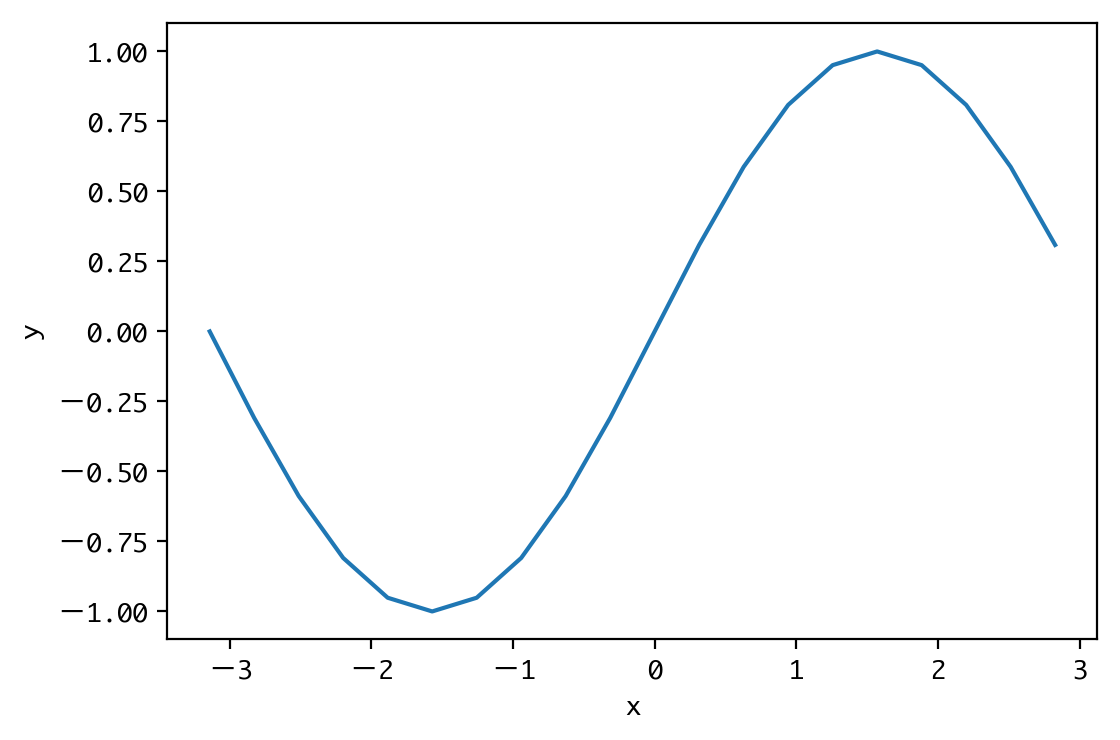

In [9]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-np.pi, np.pi, np.pi/10)
y = np.sin(x)

plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y)
plt.show()

### ブロードキャスト

ユニバーサル関数は、引数の形状が異なる場合でも、可能であれば、それらを一致させて計算しようとします。この機能をブロードキャストといいます。詳しくは、[公式の定義](https://docs.scipy.org/doc/numpy/reference/ufuncs.html#broadcasting)を参照してください。以下では簡単のために、引数が二つ（二項演算）のケースを想定して説明します。ブロードキャストのルールは、以下の四つです。

1. 一方と他方の階数（ndim）が一致しない場合、小さい方の形状（shape）の先頭に1を付けて、階数を一致させる。例えば、一方の形状が(2,4)（＝2行４列の行列）、他方が(5,)（＝5次元ベクトル）の場合、後者の形状を(1,5)（＝1行5列の行列）に変更することで、階数を一致させる。
1. 出力値の形状の各数値は、入力値の内、大きい方が採用される。例えば、入力値の一方の形状が(2,4)、他方の形状が(3,5)の場合、出力値の形状は(3,5)に決定される。
1. 入力値は、形状の各数値が、出力値のそれと一致するか、あるいは、1である場合に計算に利用できる（＝エラーとならない）。例えば、入力値の一方の形状が(2,4)、他方の形状が(3,5)、出力値の形状が(3,5)の場合、入力値の前者の形状が出力値の形状と一致せず、また、1でもないのでエラーとなる。
1. 入力値の形状の各数値に1がある場合、第一番目のデータを繰り返し利用する。例えば、ベクトル[2]（形状：(1,)）と、ベクトル[3,4]（形状2,）を計算する際、あたかも、ベクトル[2,2]とベクトル[3,4]の計算であるかのように計算する。行列の場合も、同様に計算する。

以上のルールにより、以下のように、3次元ベクトルと3行3列の行列の和を求めることも可能です。なお、numpy.repeat()は、第一引数に指定した数を、第二引数に指定した数だけ繰り返して、ベクトル（配列）を作成します。

In [10]:
import numpy as np

x = np.arange(3)
y = np.repeat(0, 9).reshape(3, 3)

print(np.add(x, y))

[[0 1 2]
 [0 1 2]
 [0 1 2]]


## 二項演算

スカラー、ベクトル、行列に対する二項演算（加法、乗法）の結果をまとめます。なお、行列積とは、以下のたぐいの計算を表します。

$$
\begin{pmatrix}
a & b \\
c & d \\
\end{pmatrix}
\begin{pmatrix}
p & q \\
r & s \\
\end{pmatrix}
=
\begin{pmatrix}
ap+br & aq+bs \\
cp+dr & cq+ds \\
\end{pmatrix}
$$

お忙しい方は、結論からどうぞ。

### +

- すべて成分ごとの和となります。以下に結果の型と値を示します。

|      ＼       | スカラー      | ベクトル      | 行列(ndarray) | 行列(matrix) |
|:-------------:|:-------------:|:-------------:|:-------------:|:------------:|
| スカラー      | スカラー      | ベクトル      | 行列(ndarray) | 行列(matrix) |
| ベクトル      | ベクトル      | ベクトル      | 行列(ndarray) | 行列(matrix) |
| 行列(ndarray) | 行列(ndarray) | 行列(ndarray) | 行列(ndarray) | 行列(matrix) |
| 行列(matrix)  | 行列(matrix)  | 行列(matrix)  | 行列(matrix)  | 行列(matrix) |

|      ＼       | スカラー     | ベクトル     | 行列(ndarray) | 行列(matrix) |
|:-------------:|:------------:|:------------:|:-------------:|:------------:|
| スカラー      | 成分ごとの和 | 成分ごとの和 | 成分ごとの和  | 成分ごとの和 |
| ベクトル      | 成分ごとの和 | 成分ごとの和 | 成分ごとの和  | 成分ごとの和 |
| 行列(ndarray) | 成分ごとの和 | 成分ごとの和 | 成分ごとの和  | 成分ごとの和 |
| 行列(matrix)  | 成分ごとの和 | 成分ごとの和 | 成分ごとの和  | 成分ごとの和 |


In [11]:
import numpy as np

x = np.matrix('0 0 0; 0 0 0')
y = 1
z = x + y

print(z)
print(type(z))

[[1 1 1]
 [1 1 1]]
<class 'numpy.matrixlib.defmatrix.matrix'>


### \*

- スカラー以外と行列(matrix)が絡むと、行列積となります。その際、ベクトルは（ブロードキャストの結果）1行n列の行列とみなされます。
- 行列(matrix)が絡まない場合は、成分ごとの積となります。

|      ＼       | スカラー      | ベクトル      | 行列(ndarray) | 行列(matrix) |
|:-------------:|:-------------:|:-------------:|:-------------:|:------------:|
| スカラー      | スカラー      | ベクトル      | 行列(ndarray) | 行列(matrix) |
| ベクトル      | ベクトル      | ベクトル      | 行列(ndarray) | 行列(matrix) |
| 行列(ndarray) | 行列(ndarray) | 行列(ndarray) | 行列(ndarray) | 行列(matrix) |
| 行列(matrix)  | 行列(matrix)  | 行列(matrix)  | 行列(matrix)  | 行列(matrix) |

|      ＼       | スカラー     | ベクトル     | 行列(ndarray) | 行列(matrix) |
|:-------------:|:------------:|:------------:|:-------------:|:------------:|
| スカラー      | 成分ごとの積 | 成分ごとの積 | 成分ごとの積  | 成分ごとの積 |
| ベクトル      | 成分ごとの積 | 成分ごとの積 | 成分ごとの積  | 行列積       |
| 行列(ndarray) | 成分ごとの積 | 成分ごとの積 | 成分ごとの積  | 行列積       |
| 行列(matrix)  | 成分ごとの積 | 行列積       | 行列積        | 行列積       |

In [12]:
import numpy as np

x = np.matrix('1 1; 1 1')
y = np.array([2, 3])

try:
    z = x * y    # 2行2列と1行2列の行列積なのでエラーとなる。
    print(z)
except ValueError:
    print('ValueErrorが発生しました１。')

try:
    z = y * x    # 1行2列と2行2列の行列積なのでエラーとならない。
    print(z)
except ValueError:
    print('ValueErrorが発生しました２。')

ValueErrorが発生しました１。
[[5 5]]


### np.dot

- スカラーが絡むと、成分ごとの積となります。
- ベクトルとベクトルの積は、内積となります。
- その他はすべて行列積となります。その際、左がベクトルの場合は行ベクトル、右がベクトルの場合は列ベクトルと解釈されます。

|      ＼       | スカラー      | ベクトル     | 行列(ndarray) | 行列(matrix) |
|:-------------:|:-------------:|:------------:|:-------------:|:------------:|
| スカラー      | スカラー      | ベクトル     | 行列(ndarray) | 行列(matrix) |
| ベクトル      | ベクトル      | スカラー     | ベクトル      | 行列(matrix) |
| 行列(ndarray) | 行列(ndarray) | ベクトル     | 行列(ndarray) | 行列(matrix) |
| 行列(matrix)  | 行列(matrix)  | 行列(matrix) | 行列(matrix)  | 行列(matrix) |

|      ＼       | スカラー     | ベクトル     | 行列(ndarray) | 行列(matrix) |
|:-------------:|:------------:|:------------:|:-------------:|:------------:|
| スカラー      | 成分ごとの積 | 成分ごとの積 | 成分ごとの積  | 成分ごとの積 |
| ベクトル      | 成分ごとの積 | 内積         | 行列積        | 行列積       |
| 行列(ndarray) | 成分ごとの積 | 行列積       | 行列積        | 行列積       |
| 行列(matrix)  | 成分ごとの積 | 行列積       | 行列積        | 行列積       |

In [13]:
import numpy as np

x = np.matrix('1 1; 1 1')
y = np.array([2, 3])

try:
    z = np.dot(x, y)    # 2行2列と2行1列の行列積なのでエラーとならない。
    print(z)
except ValueError:
    print('ValueErrorが発生しました１。')

try:
    z = np.dot(y, x)    # 1行2列と2行2列の行列積なのでエラーとならない。
    print(z)
except ValueError:
    print('ValueErrorが発生しました２。')

[[5 5]]
[[5 5]]


### @

Python 3.5以降（[PEP 465](https://www.python.org/dev/peps/pep-0465/))で利用可能となりました。

- 以下はエラーとなり、計算不能です。
    - スカラーが絡む
    - ベクトルと行列(matrix)が絡む
- ベクトルとベクトルの積は、内積となります。
- その他はすべて行列積となります。その際、左がベクトルの場合は行ベクトル、右がベクトルの場合は列ベクトルと解釈されます。

|      ＼       | スカラー | ベクトル | 行列(ndarray) | 行列(matrix) |
|:-------------:|:--------:|:--------:|:-------------:|:------------:|
| スカラー      | 計算不能 | 計算不能 | 計算不能      | 計算不能     |
| ベクトル      | 計算不能 | スカラー | ベクトル      | 計算不能     |
| 行列(ndarray) | 計算不能 | ベクトル | 行列(ndarray) | 行列(matrix) |
| 行列(matrix)  | 計算不能 | 計算不能 | 行列(matrix)  | 行列(matrix) |

|      ＼       | スカラー | ベクトル | 行列(ndarray) | 行列(matrix) |
|:-------------:|:--------:|:--------:|:-------------:|:------------:|
| スカラー      | 計算不能 | 計算不能 | 計算不能      | 計算不能     |
| ベクトル      | 計算不能 | 内積     | 行列積        | 計算不能     |
| 行列(ndarray) | 計算不能 | 行列積   | 行列積        | 行列積       |
| 行列(matrix)  | 計算不能 | 計算不能 | 行列積        | 行列積       |

以下に示すとおり、np.dotと@は、可換ではありません。

In [14]:
import numpy as np
import sys

x = 1
y = np.array([2, 3])
z = np.matrix([[4, 5], [5, 6]])

try:
    s = np.dot(x, z)
    print(s)
except ValueError:
    print('ValueErrorが発生しました１。')

try:
    s = x @ z
    print(s)
except ValueError:
    print('ValueErrorが発生しました２。')

try:
    s = np.dot(y, z)
    print(s)
except ValueError:
    print('ValueErrorが発生しました３。')

try:
    s = y @ z
    print(s)
except ValueError:
    print('ValueErrorが発生しました４。')
except:
    exc_info = sys.exc_info()
    print(exc_info[0], exc_info[1])

[[4 5]
 [5 6]]
ValueErrorが発生しました２。
[[23 28]]
<class 'RuntimeError'> Iterator automatic output has an array subtype which changed the dimensions of the output


### 結論：結局どうすれば良いのか？

以下とすることで、わかりやすく、一貫性のある行列演算が可能になるはずです。

- numpy.matrixは使わない
- ベクトルも明示的に行列（1行n列、もしくは、n行1列）として定義する
- +、\*、@を使う

ユニバーサル関数も交えて、ひとつ計算してみましょう。Tは行列の転置を表します。

In [15]:
scalar1 = 2
vector1 = np.array([[1, 2, 3]])
matrix1 = np.array([[-1, 2], [2, -4], [-5, 6]])
vector2 = np.array([[1, 2]])
matrix2 = np.array([[1, 2], [2, 4], [5, 6]])

scalar1 * matrix2 @ (vector1 @ np.abs(matrix1) + vector2).T

array([[162],
       [324],
       [570]])

以上の記載は、以下の等価な記載より、はるかに明瞭ですよね。

In [16]:
scalar1 = 2
vector1 = np.array([[1, 2, 3]])
matrix1 = np.array([[-1, 2], [2, -4], [-5, 6]])
vector2 = np.array([[1, 2]])
matrix2 = np.array([[1, 2], [2, 4], [5, 6]])

np.dot(scalar1 * matrix2, (np.dot(vector1, np.abs(matrix1)) + vector2).T)

array([[162],
       [324],
       [570]])

行列式も逆行列もやらなかったけど、入門編ということで、以上にしたいと思います。